# Importing Libraries

In [ ]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

In [ ]:
##### Other Libraries #####

## Classification Algorithms ##
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

## For building models ##
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

## For measuring performance ##
from sklearn import metrics
from sklearn.model_selection import cross_val_score


from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc



In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import tensorflow as tf
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, ZeroPadding2D
from tensorflow import keras

Load the Dataset
When opened on a text editor, it can be seen that the data file "lymphography.data" does not have column headers.
To add headers, let's list the column names then specify this list when loading the data.

In [ ]:
### List columns names based on the description
col_names = ['class', 'lymphatics', 'block of affere', 'bl. of lymph. c', 'bl. of lymph. s', 'by pass', 
 'extravasates', 'regeneration of', 'early uptake in', 'lym.nodes dimin', 'lym.nodes enlar', 
'changes in lym.', 'defect in node', 'changes in node', 'changes in stru', 'special forms', 
'dislocation of', 'exclusion of no', 'no. of nodes in']

In [ ]:
### Load the data
data = pd.read_csv("lymphography.csv",names=col_names)

In [ ]:
print("Size of dataset:", data.shape)
data.head()

Size of dataset: (148, 19)


,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
0,3,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
1,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
2,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
4,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   class            148 non-null    int64
 1   lymphatics       148 non-null    int64
 2   block of affere  148 non-null    int64
 3   bl. of lymph. c  148 non-null    int64
 4   bl. of lymph. s  148 non-null    int64
 5   by pass          148 non-null    int64
 6   extravasates     148 non-null    int64
 7   regeneration of  148 non-null    int64
 8   early uptake in  148 non-null    int64
 9   lym.nodes dimin  148 non-null    int64
 10  lym.nodes enlar  148 non-null    int64
 11  changes in lym.  148 non-null    int64
 12  defect in node   148 non-null    int64
 13  changes in node  148 non-null    int64
 14  changes in stru  148 non-null    int64
 15  special forms    148 non-null    int64
 16  dislocation of   148 non-null    int64
 17  exclusion of no  148 non-null    int64
 18  no. of nod

In [ ]:
data.isnull().sum()

class              0
lymphatics         0
block of affere    0
bl. of lymph. c    0
bl. of lymph. s    0
by pass            0
extravasates       0
regeneration of    0
early uptake in    0
lym.nodes dimin    0
lym.nodes enlar    0
changes in lym.    0
defect in node     0
changes in node    0
changes in stru    0
special forms      0
dislocation of     0
exclusion of no    0
no. of nodes in    0
dtype: int64

No missing Values

In [ ]:
data.describe()

,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,2.452703,2.743243,1.554054,1.175676,1.047297,1.243243,1.506757,1.067568,1.702703,1.060811,2.472973,2.398649,2.966216,2.804054,5.216216,2.331081,1.662162,1.790541,2.601351
std,0.575396,0.817509,0.498757,0.381836,0.212995,0.430498,0.501652,0.251855,0.458621,0.313557,0.836627,0.568323,0.868305,0.761834,2.171368,0.777126,0.474579,0.408305,1.905023
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,5.000000,3.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,4.000000,3.000000,8.000000,3.000000,2.000000,2.000000,3.000000
max,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000,4.000000,4.000000,8.000000,3.000000,2.000000,2.000000,8.000000


# Lets look how balanced or imbalanced the classes (target variable) in the dataset.

In [ ]:
data['class'].value_counts()

2    81
3    61
4     4
1     2
Name: class, dtype: int64

# Model building without sampling

In [ ]:
### Split the features and the target column.
x = data.drop('class', axis=1)
y = data['class']

In [ ]:
x.shape, y.shape

((148, 18), (148,))

In [ ]:
### Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
### Check shape to make sure it is all in order
print("Size of x_train: {} \t Size of x_test: {} \nSize of y_train: {} \t Size of y_test: {}".format(
    x_train.shape, x_test.shape, y_train.shape, y_test.shape))

#print(y_train.value_counts(), '\n', y_test.value_counts())

Size of x_train: (103, 18) 	 Size of x_test: (45, 18) 
Size of y_train: (103,) 	 Size of y_test: (45,)


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(26, input_dim=x_train.shape[1], activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])

In [ ]:
hist=model.fit(x_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 2s 13ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0097
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0097
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0097
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0097
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0097
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.

In [ ]:
print(model.evaluate(x_test, y_test))    

2/2 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0222
[0.0, 0.02222222276031971]


In [ ]:
y_pred = model.predict(x_test)
y_pred = np.round(y_pred)   

2/2 [==============================] - 0s 2ms/step


In [ ]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           1       0.02      1.00      0.04         1
           2       0.00      0.00      0.00        28
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00         2

    accuracy                           0.02        45
   macro avg       0.01      0.25      0.01        45
weighted avg       0.00      0.02      0.00        45



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
conf_Matrix = metrics.confusion_matrix(y_test, y_pred)
conf_Matrix

array([[ 1,  0,  0,  0],
       [28,  0,  0,  0],
       [14,  0,  0,  0],
       [ 2,  0,  0,  0]], dtype=int64)

In [ ]:
matrix = pd.DataFrame(conf_Matrix,  
                     columns=['Predicted_1','Predicted_2','Predicted_3','Predicted_4'],
                     index = ['Actual_1','Actual_2','Actual_3','Actual_4'])
matrix


,Predicted_1,Predicted_2,Predicted_3,Predicted_4
Actual_1,1,0,0,0
Actual_2,28,0,0,0
Actual_3,14,0,0,0
Actual_4,2,0,0,0


<AxesSubplot:title={'center':'title'}>

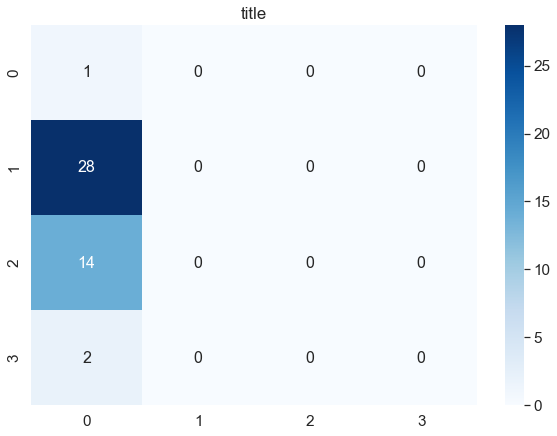

In [ ]:
plt.figure(figsize = (10,7))
plt.title("title")
    
sns.set(font_scale=1.4) # For label size
sns.heatmap(conf_Matrix, cmap="Blues", annot=True,annot_kws={"size": 16}) # Font size

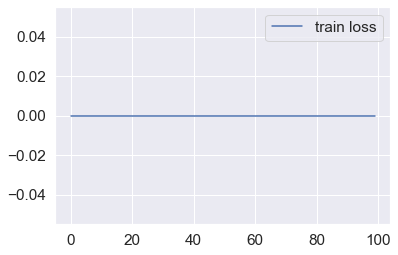

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(hist.history['loss'], label='train loss')
# plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

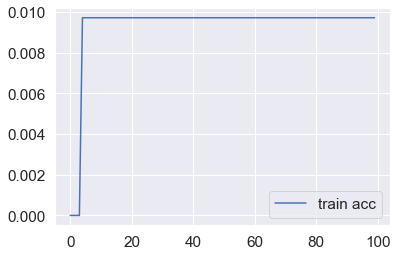

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(hist.history['accuracy'], label='train acc')
# plt.plot(hist.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

We then call model.predict on the reserved test data to generate the probability values. 
After that, use the probabilities and ground true labels to generate two data array pairs necessary to plot ROC curve:

    
fpr: False positive rates for each possible threshold tpr: 
        True positive rates for each possible threshold We can call sklearn's roc_curve() function to generate the two. 
        Here is the code to make them happen.

In [ ]:
y_pred_keras = model.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras,pos_label=1)

# fprate, tprate, thresholds = roc_curve(test_Y, pred_y, pos_label=1)

2/2 [==============================] - 0s 2ms/step


In [ ]:
auc_keras = auc(fpr_keras, tpr_keras)

In [ ]:
auc_keras

0.5

To make the plot looks more meaningful,
let's train another binary classifier and compare it with our Keras classifier later in the same plot.

In [ ]:
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf,pos_label=1)
auc_rf = auc(fpr_rf, tpr_rf)

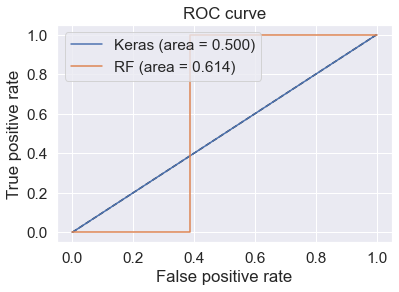

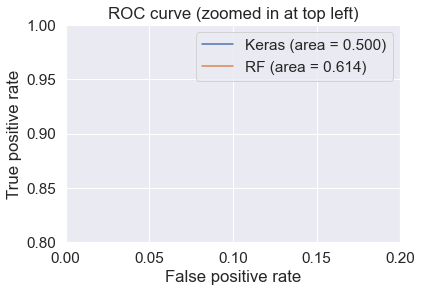

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

Dataset is a very small size data having only 148 columns.
And also is is imbalanced dataset.

       Class:       Value:      counts:
    normal find:     1               2
    metastases:      2               81
    malign lymph:    3               61
    fibrosis:        4               4


Majority of the classes 2 (metastases) and 3 (malign lymph) dominate the dataset. 
While the classes 4 (fibrosis) and 1 (normal find) are really under-represented.

Because of this, we will create and compare models trained using the upsampled data and the regular (not upsampled) data.

Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, 
i.e one class label has a very high number of observations and the other has a very low number of observations.

Upsample / Oversample
We've seen above that the dataset is imbalanced. 
As a workaround, we will upsample/oversample minority classes so that its count is same as the major classes

To do this, we should first merge the x_train and y_train. 
Shown below is the value counts of target variable before upsampling.

# OverSample the data by SMOTE

In [ ]:
### Split the features and the target column.
x = data.drop('class', axis=1)
y = data['class']


In [ ]:
data_train = data.copy()

data_train

,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
0,3,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
1,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
2,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
4,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,3,3,2,1,1,2,2,1,2,1,2,2,4,3,5,2,2,2,4
144,2,2,1,1,1,1,1,1,1,1,1,1,1,1,3,1,2,2,1
145,3,2,2,1,1,1,2,1,2,1,3,3,3,3,8,3,2,2,4
146,2,2,1,1,1,1,1,1,2,1,2,2,4,2,2,1,2,2,1


In [ ]:
print("Data Train shape:", data_train.shape, "\n\nData Train value counts:\n",data_train['class'].value_counts())

Data Train shape: (148, 19) 

Data Train value counts:
 2    81
3    61
4     4
1     2
Name: class, dtype: int64


In [ ]:
data_train.shape

(148, 19)

After merging the x_train and y_train, let's create a dataframe for the upsampled data 
and initialize it with the dominating class.

Then, we can upsample the minority classes so that its value counts will be same as of the dominating class. 
In this case, we will upsample the classes 1, 3 and 4 to have 53 rows each.

In [ ]:
### Append the class with highest value counts
upsample_traindata = data_train[data_train["class"]==2]

### Upsample minority classes
for n in [1, 3, 4]:
    upsampled = resample(data_train[data_train["class"]==n],
                        replace=True, # sample with replacement
                        n_samples=53, # match number in majority class
                        random_state=1) # reproducible results
    
    upsample_traindata = pd.concat([upsample_traindata, upsampled]) 



In [ ]:
# Check the size of upsample train data
print("Size of upsample_traindata:", upsample_traindata.shape)
print("\n\nValue counts for class:\n", upsample_traindata["class"].value_counts())


Size of upsample_traindata: (240, 19)


Value counts for class:
 2    81
1    53
3    53
4    53
Name: class, dtype: int64


In [ ]:
upsample_traindata.shape

(240, 19)

In [ ]:
### Split the features and the target column.
xup = upsample_traindata.drop('class', axis=1)
yup = upsample_traindata['class']

In [ ]:
xup.shape, yup.shape

((240, 18), (240,))

In [ ]:
from imblearn.over_sampling import SMOTE
# os = SMOTE(random_state=0)

os=SMOTE(k_neighbors=1)

columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train,y_train)

print("length of oversampled data is ",len(os_data_X))


length of oversampled data is  240


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, os_data_X.shape,os_data_y.shape

((168, 18), (72, 18), (168,), (72,), (240, 18), (240,))

Now, we have a balanced data.

Let's separate the predictors from the target variable again to be used for modelling.

# Model Building of OverSampled Data

In [ ]:

os_data_X.shape, os_data_y.shape 

((240, 18), (240,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, os_data_X.shape,os_data_y.shape

((168, 18), (72, 18), (168,), (72,), (240, 18), (240,))

In [ ]:
model_sm = keras.Sequential([
    keras.layers.Dense(26, input_dim=X_train.shape[1], activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model_sm.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])

In [ ]:
hist_sm=model_sm.fit(X_train,y_train, epochs=100)

Epoch 1/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1667
Epoch 4/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2738
Epoch 5/100
6/6 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.2738
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2738
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2738
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2738
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2738
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 

In [ ]:
print(model_sm.evaluate(X_test, y_test))    
   

3/3 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.1944
[0.0, 0.1944444477558136]


In [ ]:
y_pred = model_sm.predict(X_test)
y_pred = np.round(y_pred)   
    

3/3 [==============================] - 0s 1ms/step


In [ ]:

print("Classification Report: \n", classification_report(y_test, y_pred))



Classification Report: 
               precision    recall  f1-score   support

           1       0.19      1.00      0.33        14
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        16

    accuracy                           0.19        72
   macro avg       0.05      0.25      0.08        72
weighted avg       0.04      0.19      0.06        72



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)


In [ ]:
df_cm = pd.DataFrame(cm,  
                     columns=['Predicted_1','Predicted_2','Predicted_3','Predicted_4'],
                     index = ['Actual_1','Actual_2','Actual_3','Actual_4'])


In [ ]:
df_cm

,Predicted_1,Predicted_2,Predicted_3,Predicted_4
Actual_1,14,0,0,0
Actual_2,22,0,0,0
Actual_3,20,0,0,0
Actual_4,16,0,0,0


<AxesSubplot:title={'center':'title'}>

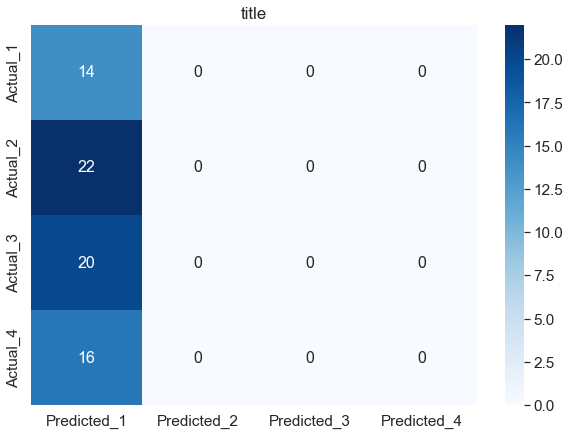

In [ ]:
plt.figure(figsize = (10,7))
plt.title("title")
    
sns.set(font_scale=1.4) # For label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}) # Font size

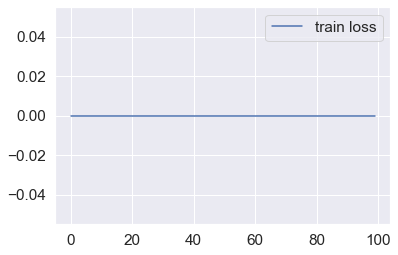

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(hist_sm.history['loss'], label='train loss')
# plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

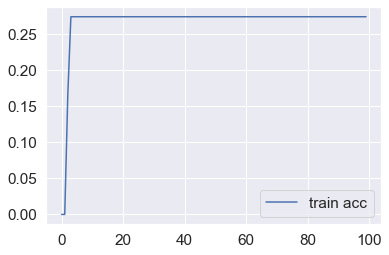

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(hist_sm.history['accuracy'], label='train acc')
# plt.plot(hist.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_pred_keras_sm = model_sm.predict(X_test).ravel()
fpr_keras_sm, tpr_keras_sm, thresholds_keras_sm = roc_curve(y_test, y_pred_keras_sm,pos_label=1)

3/3 [==============================] - 0s 2ms/step


In [ ]:
y_pred_keras_sm.shape, y_pred.shape


((72,), (72, 1))

In [ ]:
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

0.5

In [ ]:
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf,pos_label=1)
auc_rf = auc(fpr_rf, tpr_rf)


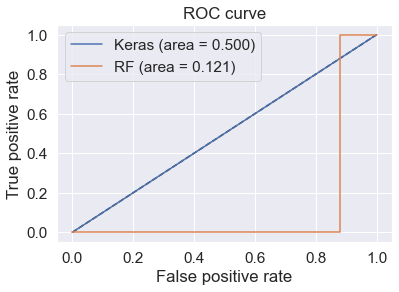

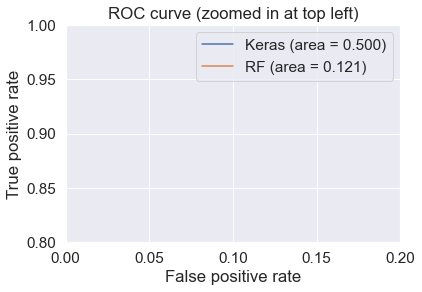

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

f1-score for minority class 1 improved to 0.33 from 0.04. 


# Saving the oversampled data

In [ ]:
import pickle

with open('Lymphography.pkl', 'wb') as f:
    pickle.dump(model_sm, f)


INFO:tensorflow:Assets written to: ram://d9ccc379-9a3e-4e79-acef-f82ac498ebc7/assets
